<a href="https://colab.research.google.com/github/sabumjung/Machine-Learning-Algorithm/blob/master/ch04_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scikit-learn을 이용한 고차원 선형 회귀

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score


# For reproducibility
np.random.seed(1000)

In [0]:
def show_dataset(data):
    fig, ax = plt.subplots(4, 3, figsize=(20, 15))

    for i in range(4):
        for j in range(3):
            ax[i, j].plot(data.data[:, i + (j + 1) * 3])
            ax[i, j].grid()

    plt.show()

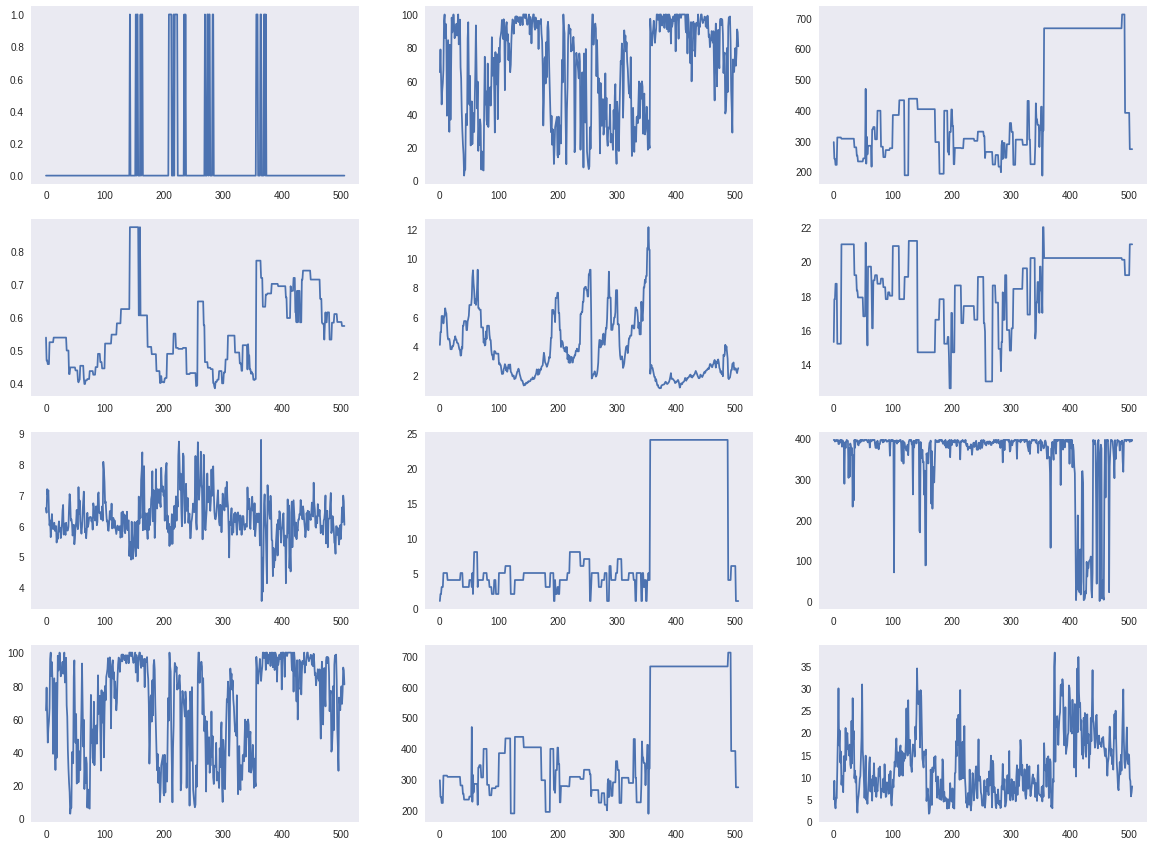

In [8]:
# Load dataset
boston = load_boston()

# Show dataset
show_dataset(boston)

In [10]:
# Create a linear regressor instance
lr = LinearRegression(normalize=True)

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, test_size=0.1)

# Train the model
lr.fit(X_train, Y_train)

print('Score %.3f' % lr.score(X_test, Y_test))

Score 0.571


In [11]:
# CV score
scores = cross_val_score(lr, boston.data, boston.target, cv=7, scoring='neg_mean_squared_error')
print('CV Negative mean squared errors mean: %.3f' % scores.mean())
print('CV Negative mean squared errors std: %.3f' % scores.std())

CV Negative mean squared errors mean: -37.287
CV Negative mean squared errors std: 46.790


In [17]:
# CV R2 score
r2_scores = cross_val_score(lr, boston.data, boston.target, cv=10, scoring='r2')
print('CV R2 score: %.3f' % r2_scores.mean())

CV R2 score: 0.203


In [14]:
print('y = ' + str(lr.intercept_) + ' ')
for i, c in enumerate(lr.coef_):
  print(str(c) + ' * x' + str(i))

y = 36.09380663233003 
-0.10508860310747363 * x0
0.04897837694608339 * x1
0.010208401054648987 * x2
3.0637226431457014 * x3
-16.938645504596895 * x4
3.7099743479244762 * x5
0.005656306265155052 * x6
-1.4995721785124143 * x7
0.28763783622318717 * x8
-0.01151272111789949 * x9
-0.9322260373743555 * x10
0.010208330332380383 * x11
-0.5711483476974418 * x12
